In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sounddevice as sd
from IPython.display import HTML

In [2]:
df = pd.read_csv('CovidFaelle_Timeline.csv', sep=';')

In [3]:
df.head(20)

,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
0,26.02.2020 00:00:00,Burgenland,1,294436,0,0,0,0,0,0,0,0
1,26.02.2020 00:00:00,Kärnten,2,561293,0,0,0,0,0,0,0,0
2,26.02.2020 00:00:00,Niederösterreich,3,1684287,0,0,0,0,0,0,0,0
3,26.02.2020 00:00:00,Oberösterreich,4,1490279,0,0,0,0,0,0,0,0
4,26.02.2020 00:00:00,Salzburg,5,558410,0,0,0,0,0,0,0,0
5,26.02.2020 00:00:00,Steiermark,6,1246395,0,0,0,0,0,0,0,0
6,26.02.2020 00:00:00,Tirol,7,757634,0,0,0,0,0,0,0,0
7,26.02.2020 00:00:00,Vorarlberg,8,397139,0,0,0,0,0,0,0,0
8,26.02.2020 00:00:00,Wien,9,1911191,1,1,1,"0,05232339",0,0,0,0
9,26.02.2020 00:00:00,Österreich,10,8901064,1,1,1,"0,01123461",0,0,0,0


In [4]:
df.columns

Index(['Time', 'Bundesland', 'BundeslandID', 'AnzEinwohner', 'AnzahlFaelle',
       'AnzahlFaelleSum', 'AnzahlFaelle7Tage', 'SiebenTageInzidenzFaelle',
       'AnzahlTotTaeglich', 'AnzahlTotSum', 'AnzahlGeheiltTaeglich',
       'AnzahlGeheiltSum'],
      dtype='object')

In [5]:
df['SiebenTageInzidenzFaelle'].head(20) # noticing error in floats

0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8     0,05232339
9     0,01123461
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18     0,1569702
19    0,03370384
Name: SiebenTageInzidenzFaelle, dtype: object

### Cleaning the Data ###

In [6]:
# cleaning data - changing ',' in floats to '.'.
df['SiebenTageInzidenzFaelle'] = df['SiebenTageInzidenzFaelle'].str.replace(',', '.')
# getting rid of each 10th value since this is the value for the whole of austria
df = df.loc[(df['BundeslandID'] % 10 != 0), :].reset_index()
df.head(10)

,index,Time,Bundesland,BundeslandID,AnzEinwohner,AnzahlFaelle,AnzahlFaelleSum,AnzahlFaelle7Tage,SiebenTageInzidenzFaelle,AnzahlTotTaeglich,AnzahlTotSum,AnzahlGeheiltTaeglich,AnzahlGeheiltSum
0,0,26.02.2020 00:00:00,Burgenland,1,294436,0,0,0,0,0,0,0,0
1,1,26.02.2020 00:00:00,Kärnten,2,561293,0,0,0,0,0,0,0,0
2,2,26.02.2020 00:00:00,Niederösterreich,3,1684287,0,0,0,0,0,0,0,0
3,3,26.02.2020 00:00:00,Oberösterreich,4,1490279,0,0,0,0,0,0,0,0
4,4,26.02.2020 00:00:00,Salzburg,5,558410,0,0,0,0,0,0,0,0
5,5,26.02.2020 00:00:00,Steiermark,6,1246395,0,0,0,0,0,0,0,0
6,6,26.02.2020 00:00:00,Tirol,7,757634,0,0,0,0,0,0,0,0
7,7,26.02.2020 00:00:00,Vorarlberg,8,397139,0,0,0,0,0,0,0,0
8,8,26.02.2020 00:00:00,Wien,9,1911191,1,1,1,0.05232339,0,0,0,0
9,10,27.02.2020 00:00:00,Burgenland,1,294436,0,0,0,0,0,0,0,0


In [7]:
# getting min vaules
dfAmin = df.groupby('Bundesland')['AnzahlFaelle'].min()
# getting max values
dfAmax = df.groupby('Bundesland')['AnzahlFaelle'].max()
dfAmin, dfAmax

(Bundesland
 Burgenland          0
 Kärnten             0
 Niederösterreich    0
 Oberösterreich      0
 Salzburg            0
 Steiermark          0
 Tirol               0
 Vorarlberg          0
 Wien                1
 Name: AnzahlFaelle, dtype: int64,
 Bundesland
 Burgenland           307
 Kärnten              843
 Niederösterreich    1133
 Oberösterreich      2257
 Salzburg             805
 Steiermark          1097
 Tirol               1006
 Vorarlberg           803
 Wien                1934
 Name: AnzahlFaelle, dtype: int64)

In [8]:
# defining the amplitude values for the Audio-Enginge via the Infectionrate and scaling the values to go between 0 and 1
dfAmpB = np.array(df.loc[(df['BundeslandID'] == 1), 'AnzahlFaelle'])
dfAmpBn = dfAmpB/dfAmpB.max()
dfAmpK = np.array(df.loc[(df['BundeslandID'] == 2), 'AnzahlFaelle'])
dfAmpKn = dfAmpK/dfAmpK.max()
dfAmpN = np.array(df.loc[(df['BundeslandID'] == 3), 'AnzahlFaelle'])
dfAmpNn = dfAmpN/dfAmpN.max()
dfAmpO = np.array(df.loc[(df['BundeslandID'] == 4), 'AnzahlFaelle'])
dfAmpOn = dfAmpO/dfAmpO.max()
dfAmpS = np.array(df.loc[(df['BundeslandID'] == 5), 'AnzahlFaelle'])
dfAmpSn = dfAmpS/dfAmpS.max()
dfAmpSt = np.array(df.loc[(df['BundeslandID'] == 6), 'AnzahlFaelle'])
dfAmpStn = dfAmpSt/dfAmpSt.max()
dfAmpT = np.array(df.loc[(df['BundeslandID'] == 7), 'AnzahlFaelle'])
dfAmpTn = dfAmpT/dfAmpT.max()
dfAmpV = np.array(df.loc[(df['BundeslandID'] == 8), 'AnzahlFaelle'])
dfAmpVn = dfAmpV/dfAmpV.max()
dfAmpW = np.array(df.loc[(df['BundeslandID'] == 9), 'AnzahlFaelle'])
dfAmpWn = dfAmpW/dfAmpW.max()

### Creating the Audio Engine ###

In [9]:
# sd.query_devices()
sd.default.device = 'Screen Record w/Audio, Core Audio'   # just setting this up for screen-rec

# notelength
dur = 0.125
# attack and decay of tones
a = dur * 0.1
d = dur * 0.9

# simple sine-oscillator
def sine(frq, a, d):
    sr = 44100
    env = np.concatenate((np.linspace(0, 0.5, int(round(sr * a, 0))), np.linspace(0.5, 0, int(round(sr * d, 0)))))
    t = np.arange(int(round(d * sr + a* sr, 0))) / sr
    sine = 1 * np.sin(2 * np.pi * frq * t) * env
    return sine

# pause - function. for future iterations of this piece.
def pause(note):
    pause = np.zeros_like(note)
    return pause

# applying frequency modulation to the oscillator
def fm(freq, ratio, a, d):
    freqfm = freq + sine(freq * ratio, a, d)
    return freqfm

# simple panning - algorithm
def panner(x, angle):
    # pan a mono audio source into stereo
    # x is a numpy array, angle is the angle in radiants
    left = np.sqrt(2)/2.0 * (np.cos(angle) - np.sin(angle)) * x
    right = np.sqrt(2)/2.0 * (np.cos(angle) + np.sin(angle)) * x
    return np.dstack((left,right))[0]


#### Defining the Score ####

In [10]:
# tuning in just intonation to generate alienating feeling

partB = [sine(fm(110, 5, a, d), a, d) * dfAmpBn[i] for i in range(len(dfAmpBn))]
partB2 = np.concatenate(partB)
partK = [sine(fm(220, 2, a, d), a, d) * dfAmpKn[i] for i in range(len(dfAmpKn))]
partK2 = np.concatenate(partK)
partN = [sine(fm(110 * (3/4), 2, a, d), a, d) * dfAmpNn[i] for i in range(len(dfAmpNn))]
partN2 = np.concatenate(partN)
partO = [sine(fm(440, 1.25, a, d), a, d) * dfAmpOn[i] for i in range(len(dfAmpOn))]
partO2 = np.concatenate(partO)
partS = [sine(fm(220 * (15/8), 2, a, d), a, d) * dfAmpSn[i] for i in range(len(dfAmpSn))]
partS2 = np.concatenate(partS)
partSt = [sine(fm(440 * (9/5), 2, a, d), a, d) * dfAmpStn[i] for i in range(len(dfAmpStn))]
partSt2 = np.concatenate(partSt)
partT = [sine(fm(880 *(6/5), 1.25, a, d), a, d) * dfAmpTn[i] for i in range(len(dfAmpTn))]
partT2 = np.concatenate(partT)
partV = [sine(fm(880 * (2/3), 1.5, a, d), a, d) * dfAmpVn[i] for i in range(len(dfAmpVn))]
partV2 = np.concatenate(partV)
partW = [sine(fm(1760 * (3/4), 2.5, a, d), a, d) * dfAmpWn[i] for i in range(len(dfAmpWn))]
partW2 = np.concatenate(partW)

### Data Animation ###

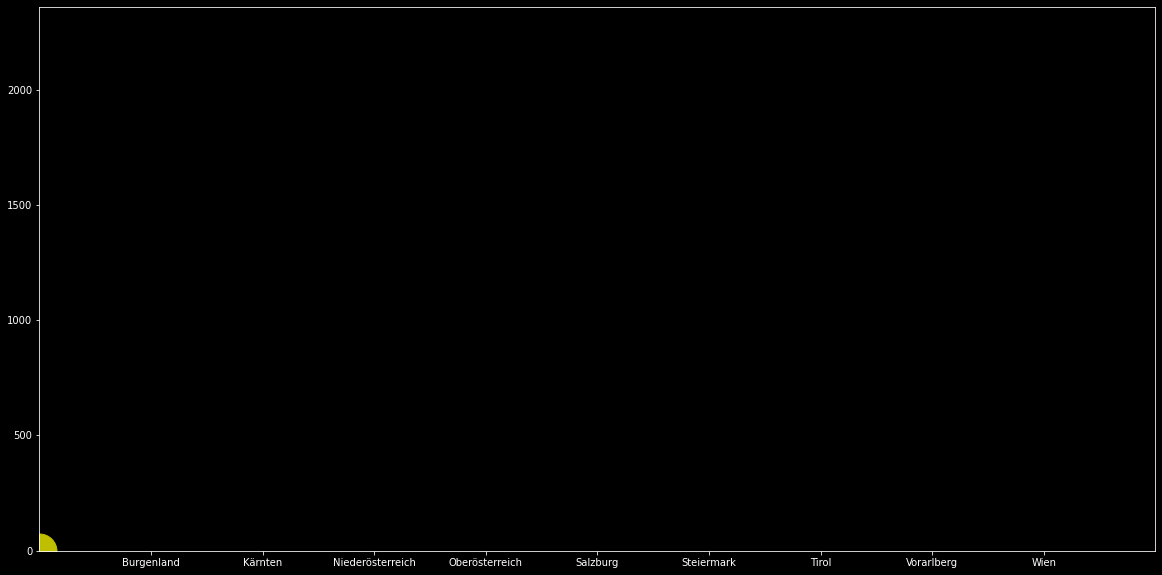

In [11]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, df['AnzahlFaelle'].max() + 100)
ax.set_xticks(np.arange(1, 10))
ax.set_xticklabels(df.loc[0:8, 'Bundesland'])
line, = ax.plot(0, 0, 'yo', ms=35)

def animation_frame(i):
    line.set_xdata(df.loc[i:i+8, 'BundeslandID'])
    line.set_ydata(df.loc[i:i+8, 'AnzahlFaelle'])
    return line, 

animation = FuncAnimation(fig, func=animation_frame, frames=np.arange(0, len(df), 9), interval=dur * 1000, blit=False)

## Executing Data Sonification and Visualization ##

In [12]:
# one might need to execute the following cell twice (or more times) to get audio and animation to sync.

In [16]:
sd.play((panner(partB2, np.radians(-40)) \
        + panner(partK2, np.radians(-40 + (80/9))) \
        + panner(partN2, np.radians(-40 + (80/9) * 2)) \
        + panner(partO2, np.radians(-40 + (80/9) * 3)) \
        + panner(partS2, np.radians(-40 + (80/9) * 4)) \
        + panner(partSt2, np.radians(-40 + (80/9) * 5)) \
        + panner(partT2, np.radians(-40 + (80/9) * 6)) \
        + panner(partV2, np.radians(-40 + (80/9) * 7)) \
        + panner(partW2, np.radians(-40 + (80/9) * 8))) * 0.25, 44100)

HTML(animation.to_html5_video())